In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1: Exploratory Data Analysis

The data contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df2 = df

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


#### Calculate total number of logins per each 15min interval

In [7]:
df2['user_login']=1
df2.head()

login_time  user_login
0 1970-01-01 20:13:18           1
1 1970-01-01 20:16:10           1
2 1970-01-01 20:16:37           1
3 1970-01-01 20:16:36           1
4 1970-01-01 20:26:21           1

In [8]:
resampled = df2.set_index('login_time').resample('15min').sum()

In [9]:
resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_login  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [11]:
resampled.head()

user_login
login_time                     
1970-01-01 20:00:00           2
1970-01-01 20:15:00           6
1970-01-01 20:30:00           9
1970-01-01 20:45:00           7
1970-01-01 21:00:00           1

In [14]:
resampled.shape

(9788, 1)

In [12]:
resampled.describe()

user_login
count  9788.000000
mean      9.515938
std       8.328818
min       0.000000
25%       3.000000
50%       7.000000
75%      13.000000
max      73.000000

It appears on average there are 10 logins per 15min interval. Let's look how many instances with logins more than the average.

#### Login counts that are greater than the average

In [15]:
over_avg = resampled[resampled['user_login']>=10]
over_avg.shape

(3834, 1)

In [16]:
over_avg.head()

user_login
login_time                     
1970-01-01 23:00:00          16
1970-01-01 23:15:00          13
1970-01-01 23:30:00          14
1970-01-01 23:45:00          15
1970-01-02 00:00:00          10

#### The daily maxiumum number of logins of the logins that are greater than the average number of logins

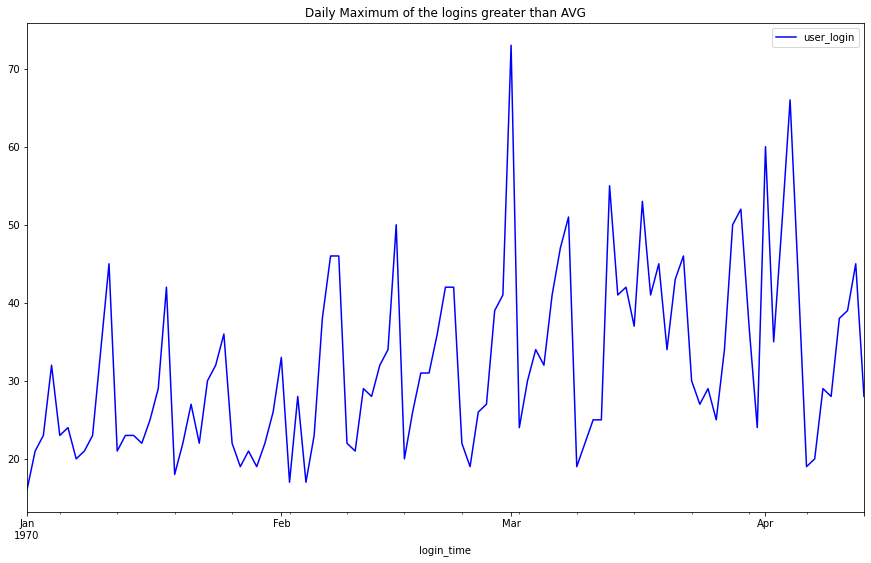

In [32]:
over_avg.resample(rule='D').max().plot(figsize=(15,9), color='blue', title='Daily Maximum of the logins greater than AVG')

Let's also get daily rolling mean and std to visualize trend and variances.

#### Calculate daily rolling mean and standard deviation

In [20]:
rollmean = resampled.resample(rule='D').mean()
rollstd = resampled.resample(rule='D').std()

#### Graphical visualization of all of the above in the same plot

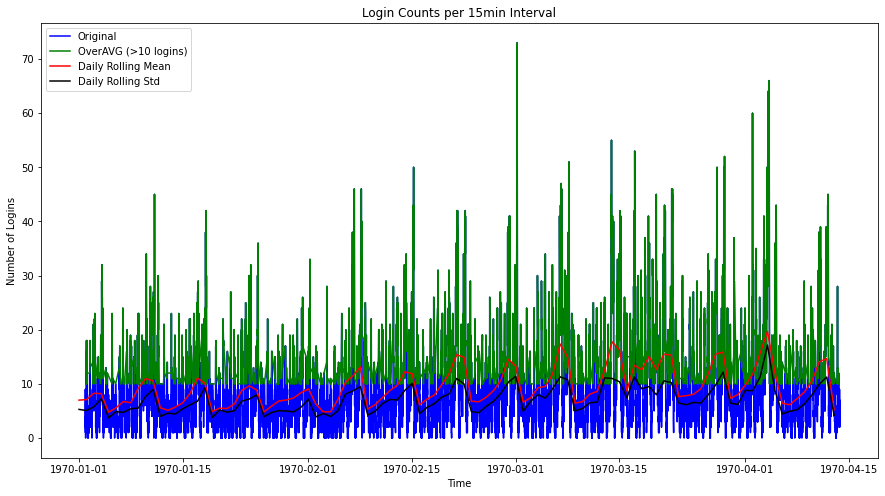

In [21]:
_ = plt.figure(figsize=(15,8))
_ = plt.plot(resampled, color='blue', label='Original')
_ = plt.plot(over_avg, color='green', label='OverAVG (>10 logins)')
_ = plt.plot(rollmean, color='red', label='Daily Rolling Mean')
_ = plt.plot(rollstd, color='black', label='Daily Rolling Std')
_ = plt.xlabel('Time')
_ = plt.ylabel('Number of Logins')
_ = plt.title('Login Counts per 15min Interval')
_ = plt.legend(loc='best')
plt.show()

#### Calculate Monthly Average of login counts from 15min interval

In [17]:
monthly_avg = resampled.resample(rule='M').mean()

In [19]:
monthly_avg.head()

user_login
login_time            
1970-01-31    7.333909
1970-02-28    9.178943
1970-03-31   11.331653
1970-04-30   10.999186

According to the above resulting dataframe, for example, on average there are 7 logins in each 15min in the month of January.

#### Graphical visualization of Daily Average across the months

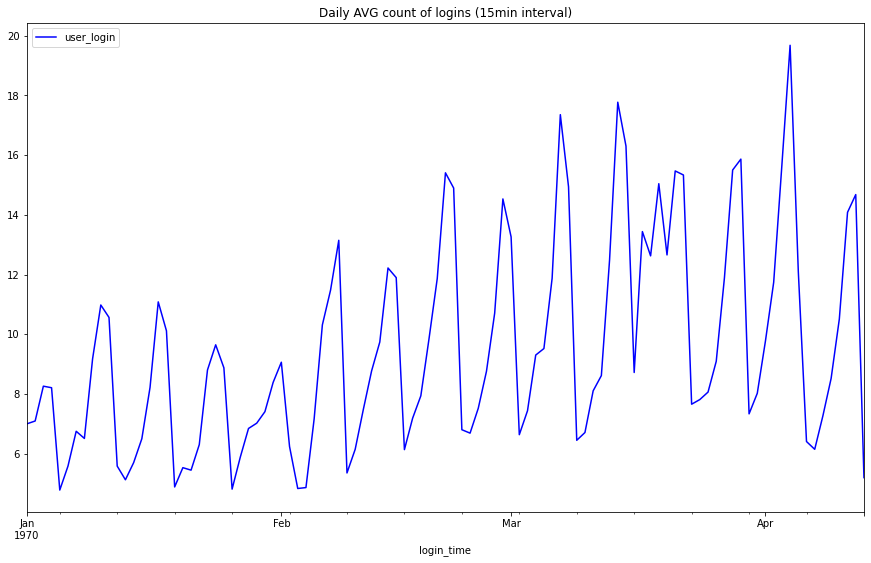

In [70]:
resampled.resample('D').mean().plot(figsize=(15,9), color='blue', title='Daily AVG count of logins (15min interval)')

#### Graphical visualization of Weekly Average across the months

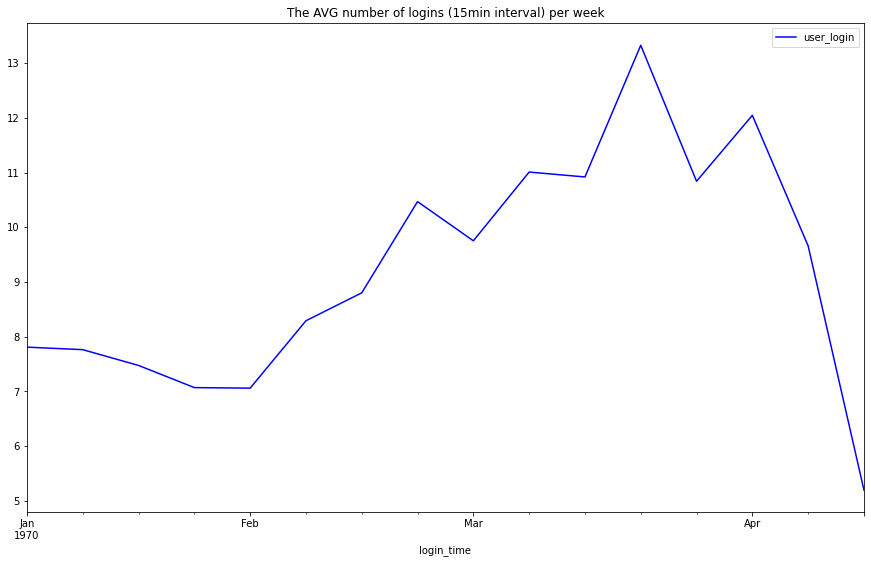

In [28]:
resampled.resample('W').mean().plot(figsize=(15,9), color='blue', title='The AVG number of logins (15min interval) per week')

#### Graphical visualization of Monthly Average

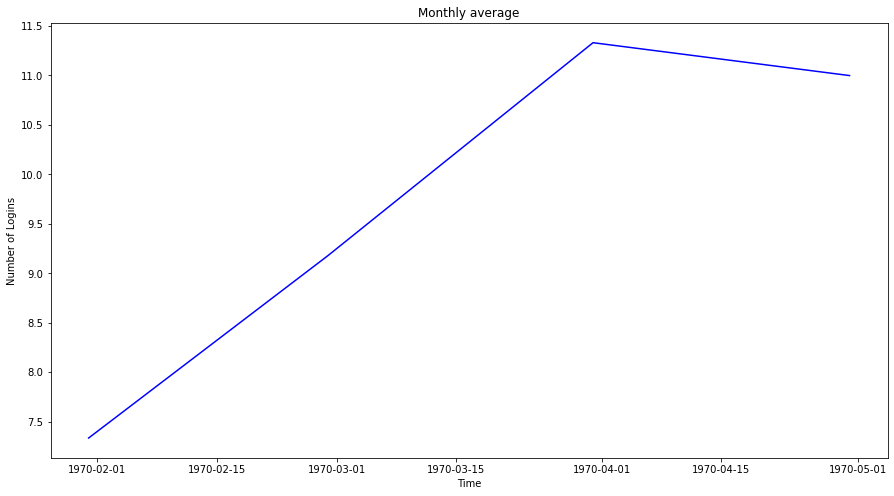

In [18]:
_ = plt.figure(figsize=(15,8))
_ = plt.plot(monthly_avg, color='blue')
_ = plt.xlabel('Time')
_ = plt.ylabel('Number of Logins')
_ = plt.title('Monthly average')
plt.show()

It appears, on average, the most amount of logins occurred in April. So let's take a closer look at the month of April.

In [20]:
apr = resampled['1970-04']

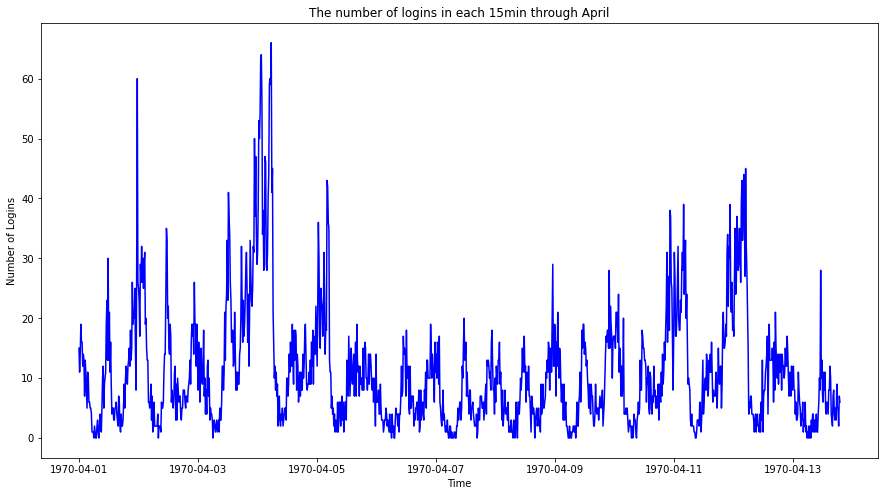

In [22]:
_ = plt.figure(figsize=(15,8))
_ = plt.plot(apr, color='blue')
_ = plt.xlabel('Time')
_ = plt.ylabel('Number of Logins')
_ = plt.title('The number of logins in each 15min through April')
plt.show()

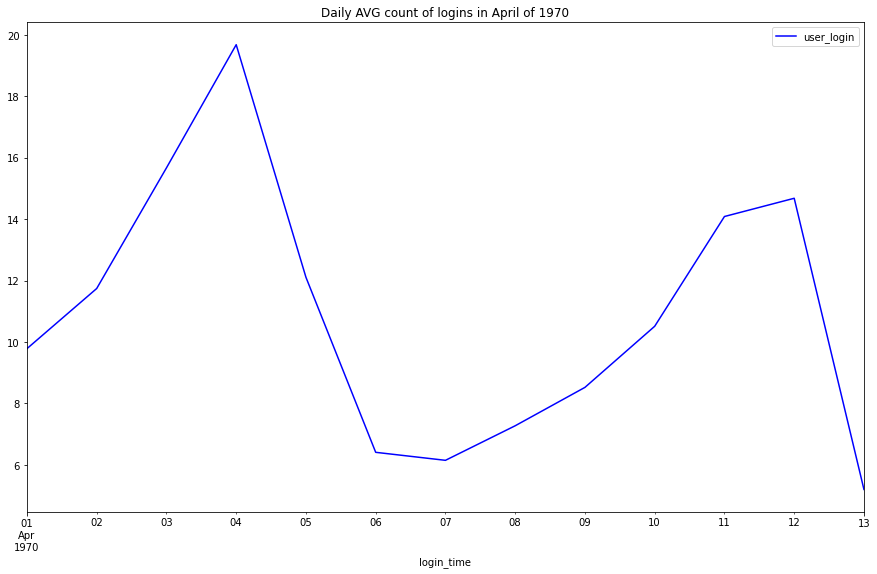

In [25]:
resampled['1970-04'].resample('D').mean().plot(figsize=(15,9), color='blue', title='Daily AVG count of logins in April of 1970')

According to the above plot, the logins spiked on the 4th and 12th of April. Let's take a closer look at the hours of the day for each of these days.

#### April the 4th - Number of Logins per each 15min

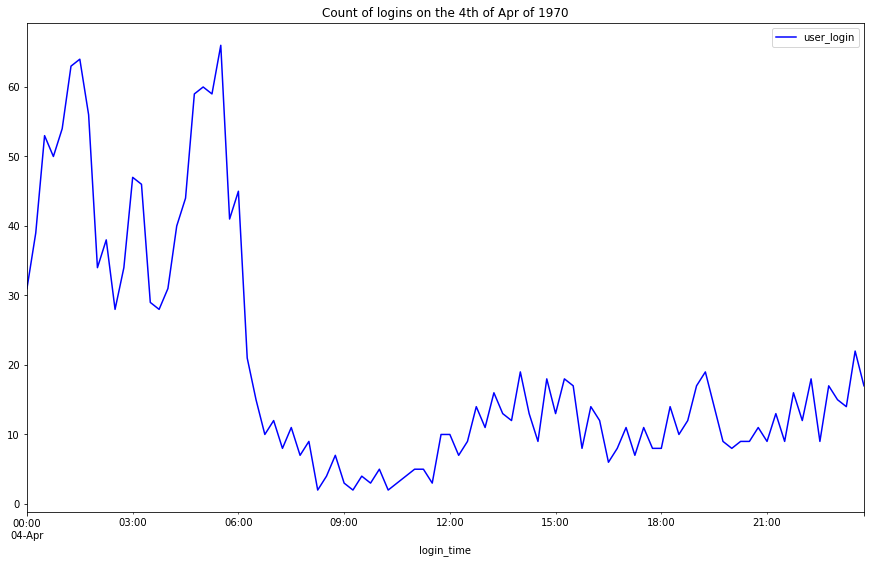

In [26]:
resampled['1970-04-04'].plot(figsize=(15,9), color='blue', title='Count of logins on the 4th of Apr of 1970')

#### April the 12th - Number of Logins per each 15min

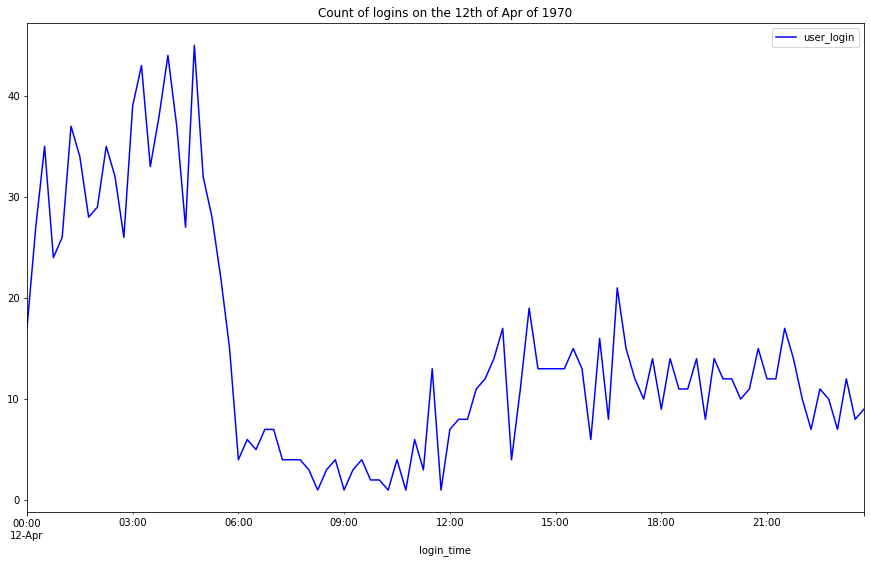

In [27]:
resampled['1970-04-12'].plot(figsize=(15,9), color='blue', title='Count of logins on the 12th of Apr of 1970')

# Part 2: Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the observation
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

__Answer__:

1. I'd choose the amount of resimbursement submissions for the toll costs as the key metric to measure success. The reason being the drivers will be encouraged to serve in both cities and their motivation is going to come from the relief from the toll costs which the Ultimate managers of city operations are proposing to reimburse. The higher the amount of submissions for the resimbursement, the greater the number of drivers driving across the toll bridge to serve the customers from both cities. 


2. 
    a. We have to ensure to measure the amount of reimbursement submissions against the amount of actual tolls collected for the driver partners only excluding the general public vehicles. This can be achived on one of three ways; 1-) Establish a partnership with the driver partners and encourage drivers to submit for reimbursements on their mobile app through their employer and have the employers make the reimbursements to their drivers on behalf of the Ultimate city operations. Then the Ultimate city operations would reimburse the driver partners. 2-) Establish a partnership with the driver partners and provide driver information to the Ultimate city operations. 3-) Establish a partnership with the driver partners and create a unique driver ID that could be associated with their drivers and their trip information and this unique driver ID will be required for the reimbursement submissions. 
    
    b. Depending on the sample size, hypothesis test could be performed on the sample of data for the key measure of success described above from before and after the change using the T-test or Z-test depending on the size of the sample. We will need to collect data from before and after the change, hence two sample groups. We could calculate the mean of the amount of tolls collected during the day and night of weekdays and weekends from before the change and compare it to that of the amount of reimbursements submitted from after the change across a certain period of time. So the mean is the statistic of interest here from each sample group and the critical value is going to be the p-value in comparing these two samples with T-test or Z-test. If we have large enough sample, then use Z-test or use T-test if otherwise. 
    
    c. So we will set up a null and an alternative hypothesis for this experiment and choose a significance level for the p-value, typically 0.05, as the criteria for the hypothesis testing. If the p-value is calculated to be less than the chosen significance level then the null hyphothesis will be rejected and the alternative hypothesis will be accepted. Depending on the test score, we will provide recommendations to the city operations with the confidence interval that was considered in the experiment.

# Part 3: Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [ ]:
from datetime import datetime, timedelta

In [85]:
# Read the data
df = pd.read_json('ultimate_data_challenge.json')

In [86]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [88]:
# Fill the Null values in the column 'phone' with the word 'unknown'
df.loc[df['phone'].isnull()==True, 'phone']='unknown'

In [89]:
# Fill the Null values in the columns 'avg_rating_of_driver' and 'avg_rating_by_driver' with their means
df.fillna(df.mean(), inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [91]:
# Convert dates to pandas datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [93]:
# Add 6 months (180 days) to signup date to calculate 6th month for each user
df['6th_months'] = df['signup_date'].apply(lambda x: pd.Period(pd.Timestamp(x), 'D'))+180

In [94]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  6th_months  
0         46.2      3.67                   5.0  2014-07-24  
1         50.0      8.26                   5.0  2014-07-28  
2        100.0      0.77                   5.0  2014-07-05  
3         80.0      2.36                   4.9  2014-07-09  
4         82.4      3.13                   4.9  2014-07-26

In [95]:
df['6th_months'] = pd.to_datetime(df['6th_months'].apply(lambda x: x.to_timestamp()))

In [97]:
df['last_trip_days'] = df['6th_months'] - df['last_trip_date']

In [98]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver 6th_months last_trip_days  
0         46.2      3.67                   5.0 2014-07-24        37 days  
1         50.0      8.26                   5.0 2014-07-28        84 days  
2        100.0      0.77                   5.0 2014-07-05       179 days  
3         80.0      2.36                   4.9 2014-07-09        10 days  
4         82.4      3.13                   4.9 2014-07-26       133 days

In [109]:
df['active'] = (df['last_trip_days']<=timedelta(days=30)).apply(lambda x: int(x))

In [110]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver 6th_months last_trip_days  \
0         46.2      3.67                   5.0 2014-07-24        37 days   
1         50.0      8.26                   5.0 2014-07-28        84 days   
2        100.0      0.77                   5.0 2014-07-05       179 days   
3         80.0      2.36                   4.9 2014-07-09        10 days   
4         82.4      3.13                   4.9 2014-07-26       133 days   

   active  
0       0  
1       0  
2       0  
3       1  
4       0

In [111]:
df['active'].value_counts()

0    37286
1    12714
Name: active, dtype: int64

In [116]:
# Users that are still active even after 6 months
(df['last_trip_days']<timedelta(days=1)).sum()

85

In [118]:
# Users that are still active even after 6 months
over_6_months = df[df['last_trip_days']<timedelta(days=1)]

### Feature engineering

In [119]:
over_6_months.head()

city  trips_in_first_30_days signup_date  \
1614      Winterfell                       4  2014-01-01   
1636      Winterfell                       2  2014-01-01   
1745      Winterfell                       3  2014-01-01   
2226  King's Landing                       4  2014-01-01   
2902      Winterfell                       1  2014-01-01   

      avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
1614                   4.9       1.02     2014-06-30   iPhone        5.3   
1636                   5.0       1.09     2014-07-01  Android        7.1   
1745                   4.8       1.00     2014-06-30   iPhone        0.0   
2226                   5.0       1.12     2014-06-30   iPhone       20.5   
2902                   5.0       1.10     2014-06-30   iPhone       17.9   

      ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
1614                False         72.0      1.65                   4.8   
1636                False         71.4      3.14                   4.7   
1745                 True        100.0      4.77                   5.0   
2226                False         51.3      1.89                   4.8   
2902                 True         82.1      2.64                   4.7   

     6th_months last_trip_days  active  
1614 2014-06-30         0 days       1  
1636 2014-06-30        -1 days       1  
1745 2014-06-30         0 days       1  
2226 2014-06-30         0 days       1  
2902 2014-06-30         0 days       1

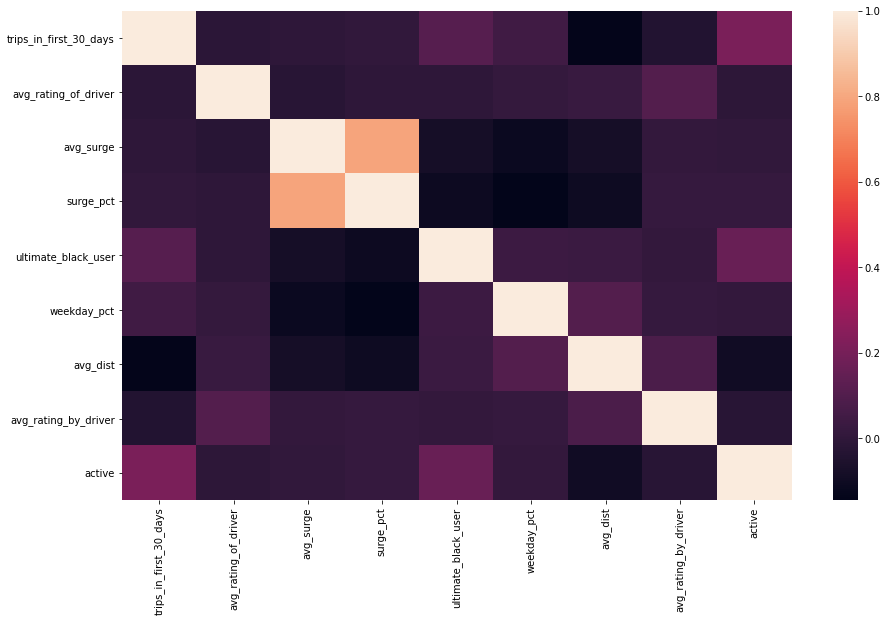

In [137]:
_ = plt.figure(figsize=(15,9))
_ = sns.heatmap(df.corr())
plt.show()

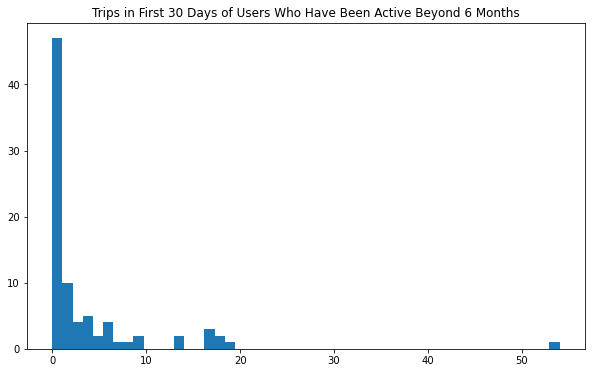

In [136]:
_ = plt.figure(figsize=(10,6))
_ = plt.hist(over_6_months['trips_in_first_30_days'], bins=50)
_ = plt.title('Trips in First 30 Days of Users Who Have Been Active Beyond 6 Months')
plt.show()

In [148]:
names = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 
         'avg_dist', 'avg_rating_by_driver']

In [149]:
sub_df = df[names]

In [150]:
sub_df.head()

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                       4                   4.7       1.10       15.4   
1                       0                   5.0       1.00        0.0   
2                       3                   4.3       1.00        0.0   
3                       9                   4.6       1.14       20.0   
4                      14                   4.4       1.19       11.8   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [153]:
y = sub_df['avg_dist']
X = sub_df.drop('avg_dist', axis=1)

In [155]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

In [159]:
X_names = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 
           'avg_rating_by_driver']

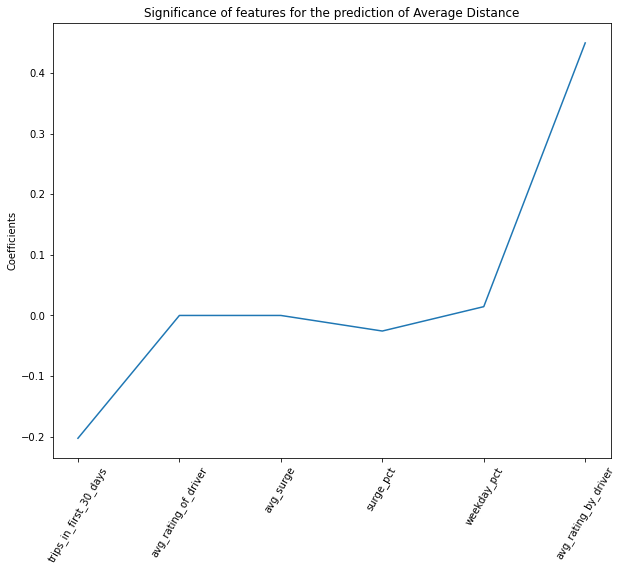

In [166]:
_ = plt.figure(figsize=(10,8))
_ = plt.plot(range(len(X_names)), lasso_coef)
_ = plt.xticks(range(len(X_names)), X_names, rotation=60)
_ = plt.ylabel('Coefficients')
_ = plt.title('Significance of features for the prediction of Average Distance')
plt.show()

Based on Lasso estimates, I will choose the features "trips_in_first_30_days" and "avg_rating_by_driver" to be used in the modeling in addition to "avg_dist" which appears to have high correlation with the target value.

In [167]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver 6th_months last_trip_days  \
0         46.2      3.67                   5.0 2014-07-24        37 days   
1         50.0      8.26                   5.0 2014-07-28        84 days   
2        100.0      0.77                   5.0 2014-07-05       179 days   
3         80.0      2.36                   4.9 2014-07-09        10 days   
4         82.4      3.13                   4.9 2014-07-26       133 days   

   active  
0       0  
1       0  
2       0  
3       1  
4       0

### Preprocesing

In [168]:
# Prepare data for modeling
names = ['trips_in_first_30_days', 'avg_dist', 'avg_rating_by_driver']
X = df[names]
y = df['active']

In [170]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [171]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 3), (15000, 3), (35000,), (15000,))

### Modeling

### 1. KNN

In [172]:
# Let's see the value of K based on a general rule of thumb
N = len(X_train)
optimal_k = int(np.sqrt(N))
optimal_k

187

In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=187)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.7537333333333334

In [177]:
# Error rate calculated by hand
error_rate = sum(y_test!=y_pred)/len(y_pred)
error_rate

0.24626666666666666

In [178]:
# Choosing the value of K
k_values = range(1, 21) # let's try numbers between 1 and 20 inclusive
error_rate=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = sum(y_test!=y_pred)/len(y_pred)
    error = round(error, 2)
    error_rate.append(error)

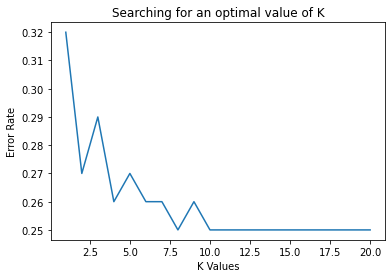

In [180]:
# Let's plot the error rates against the values of K
_ = plt.plot(k_values, error_rate)
_ = plt.xlabel('K Values')
_ = plt.ylabel('Error Rate')
_ = plt.title('Searching for an optimal value of K')
plt.show()

Error rate doesn't reduce anymore after the K value of 10. Hence, I am going to use 10 as the value of K.

#### Vanilla KNN Model - Out of The Box

In [187]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.7496

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     11185
           1       0.52      0.20      0.29      3815

    accuracy                           0.75     15000
   macro avg       0.65      0.57      0.57     15000
weighted avg       0.71      0.75      0.71     15000



#### Cross-validation

In [182]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
knn = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores) 
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.7475 0.7484 0.7519 0.7467 0.7476]
cv_scores mean:0.74842


#### Hyperparameter tuning with GridSearch

In [183]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
knn = KNeighborsClassifier(n_neighbors=10)
param_grid = {'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)

In [184]:
print('Tuned Model Parameters: {}'.format(knn_cv.best_params_))

Tuned Model Parameters: {'algorithm': 'kd_tree', 'weights': 'uniform'}


In [186]:
# Accuracy
sum(y_pred==y_test)/len(y_test)

0.7496

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     11185
           1       0.52      0.20      0.29      3815

    accuracy                           0.75     15000
   macro avg       0.65      0.57      0.57     15000
weighted avg       0.71      0.75      0.71     15000



### 2. Logistic Regression

#### Vanila Logit Model - Out of The Box

In [189]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # Instantiate the Logistic Regression
lr.fit(X_train, y_train) # Fit/train the model on training set
y_pred = lr.predict(X_test) # Make prediction on the test set

In [190]:
sum(y_pred==y_test)/len(y_test)

0.7512666666666666

In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85     11185
           1       0.58      0.08      0.14      3815

    accuracy                           0.75     15000
   macro avg       0.67      0.53      0.50     15000
weighted avg       0.71      0.75      0.67     15000



In [192]:
print(confusion_matrix(y_test, y_pred))

[[10975   210]
 [ 3521   294]]


In [193]:
# Area under the curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5291445374498119

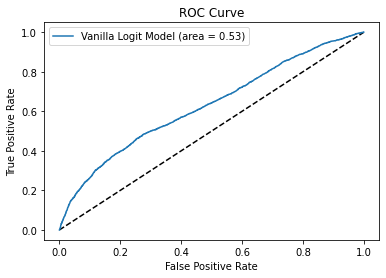

In [194]:
# Compute predicted probabilities for the label "1": y_pred_prob
y_pred_prob = lr.predict_proba(x_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Vanilla Logit Model (area = %0.2f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('ROC Curve')
plt.show()

### 3. Random Forest

In [196]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [197]:
sum(y_pred==y_test)/len(y_test)

0.718

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     11185
           1       0.43      0.33      0.37      3815

    accuracy                           0.72     15000
   macro avg       0.61      0.59      0.59     15000
weighted avg       0.70      0.72      0.70     15000



In [199]:
print(confusion_matrix(y_test, y_pred))

[[9529 1656]
 [2574 1241]]


### 4. XGBoost

In [200]:
import xgboost as xgb
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)
# Predict the labels of the test set: preds
y_pred = xg_cl.predict(X_test)

In [201]:
sum(y_pred==y_test)/len(y_test)

0.7618

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85     11185
           1       0.57      0.26      0.36      3815

    accuracy                           0.76     15000
   macro avg       0.68      0.60      0.60     15000
weighted avg       0.73      0.76      0.73     15000



In [203]:
print(confusion_matrix(y_test, y_pred))

[[10439   746]
 [ 2827   988]]
